#### Task1

a) required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

b) load dataset

In [9]:
work= pd.read_csv('DS1_C9_S4_Practice_HR_Data.csv')
work_df = work
work_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
work_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [13]:
# c) shape & structure of data
print('shape:',work_df.shape)
work_df.describe()

shape: (14999, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Task2

In [16]:
# numerical to categorical column
bins=[-1,0,1]
labels=['with the company', 'left the company']
work_df['left_retention']=pd.cut(work_df['left'],bins=bins,labels=labels)
work_df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,left_retention
0,0.38,0.53,2,157,3,0,1,0,sales,low,left the company
1,0.80,0.86,5,262,6,0,1,0,sales,medium,left the company
2,0.11,0.88,7,272,4,0,1,0,sales,medium,left the company
3,0.72,0.87,5,223,5,0,1,0,sales,low,left the company
4,0.37,0.52,2,159,3,0,1,0,sales,low,left the company


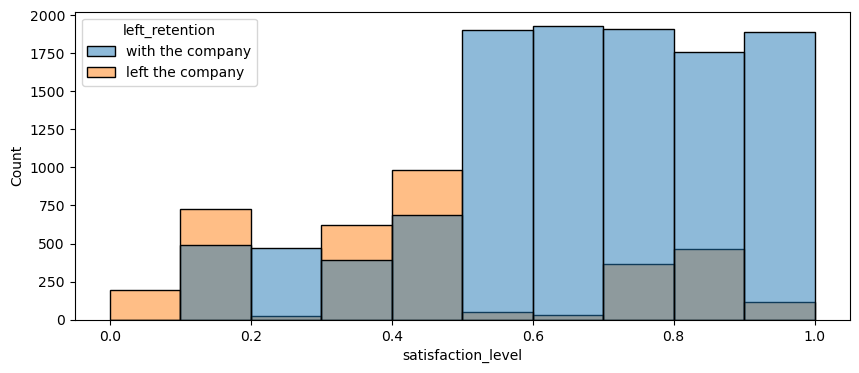

In [18]:
# a) satisfaction level of customers
bin=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
sns.histplot(x=work_df['satisfaction_level'],hue=work_df['left_retention'],bins=bin)
plt.gcf().set_size_inches(10,4)
plt.show()

satisfaction level is higher for employees who left the company while satisfaction level is lower for employees who are staying the company

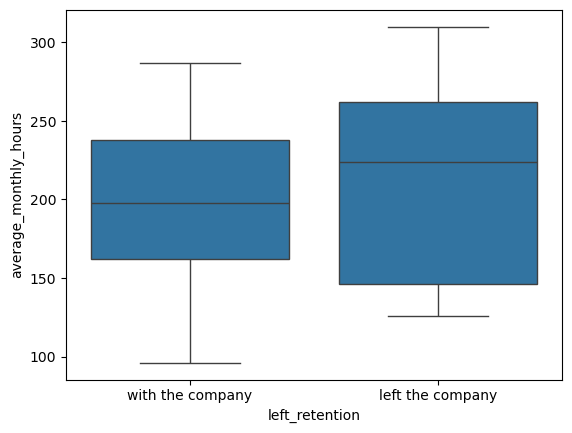

In [21]:
# b) average working hours for employees
sns.boxplot(x=work_df['left_retention'],y=work_df['average_monthly_hours'])
plt.show()

The highest average monthly working hours has been recorded by the employees who left the company. The employees who left the company has range from minimum to maximum working hours. Hence, the average monthly hours are higher for the employees who left the company 

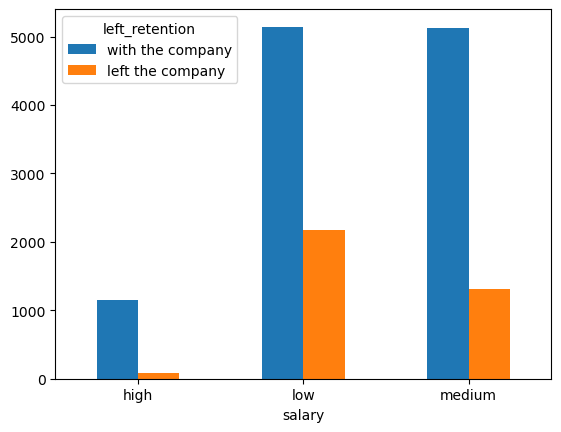

In [61]:
# c) salary of employees who stayed or left the company
pd.crosstab(work_df['salary'],work_df['left_retention']).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

The employees with low salary has left the company. The highly paid employees leaves the company in lower numbers comparitively.

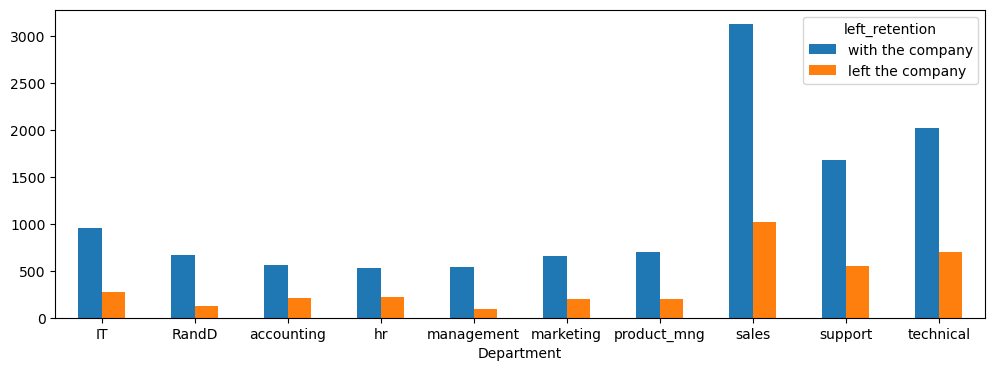

In [69]:
# d) department wise count of employees who stayed or left the company
pd.crosstab(work_df['Department'],work_df['left_retention']).plot(kind='bar')
plt.gcf().set_size_inches(12,4)
plt.xticks(rotation=0)
plt.show()

The graph shows the department wise employee retention rate. one in four employees have left the company in all departments, except in Hr department where one third of the employee has left the company

#### Task3

In [78]:
# a) Conversion of category to numerical type data
work_df['salary']=work_df['salary'].astype("category")
Label_Encoder=preprocessing.LabelEncoder()
work_df['salary_enc']=Label_Encoder.fit_transform(work_df['salary'])
work_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,left_retention,salary_enc
0,0.38,0.53,2,157,3,0,1,0,sales,low,left the company,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,left the company,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,left the company,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,left the company,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,left the company,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,left the company,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,left the company,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,left the company,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,left the company,1


In [80]:
work_df['Department']=work_df['Department'].astype("category")
Label_Encoder=preprocessing.LabelEncoder()
work_df['Department_enc']=Label_Encoder.fit_transform(work_df['Department'])
work_df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,left_retention,salary_enc,Department_enc
0,0.38,0.53,2,157,3,0,1,0,sales,low,left the company,1,7
1,0.80,0.86,5,262,6,0,1,0,sales,medium,left the company,2,7
2,0.11,0.88,7,272,4,0,1,0,sales,medium,left the company,2,7
3,0.72,0.87,5,223,5,0,1,0,sales,low,left the company,1,7
4,0.37,0.52,2,159,3,0,1,0,sales,low,left the company,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,left the company,1,8
14995,0.37,0.48,2,160,3,0,1,0,support,low,left the company,1,8
14996,0.37,0.53,2,143,3,0,1,0,support,low,left the company,1,8
14997,0.11,0.96,6,280,4,0,1,0,support,low,left the company,1,8


In [82]:
# b) Misiing value treatment
work_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
left_retention           0
salary_enc               0
Department_enc           0
dtype: int64

In [86]:
work_df.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
Department               category
salary                   category
left_retention           category
salary_enc                  int32
Department_enc              int32
dtype: object

In [88]:
# c) Outlier analysis
col_drop=['Department','salary','left_retention']
work_df=work_df.drop(col_drop,axis=1)
work_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary_enc                 int32
Department_enc             int32
dtype: object

In [92]:
left_df=pd.DataFrame(work_df[['Work_accident','left','promotion_last_5years']])
left_df

,Work_accident,left,promotion_last_5years
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [94]:
col_drop=['Work_accident','left','promotion_last_5years']
new_df=work_df.drop(col_drop,axis=1)

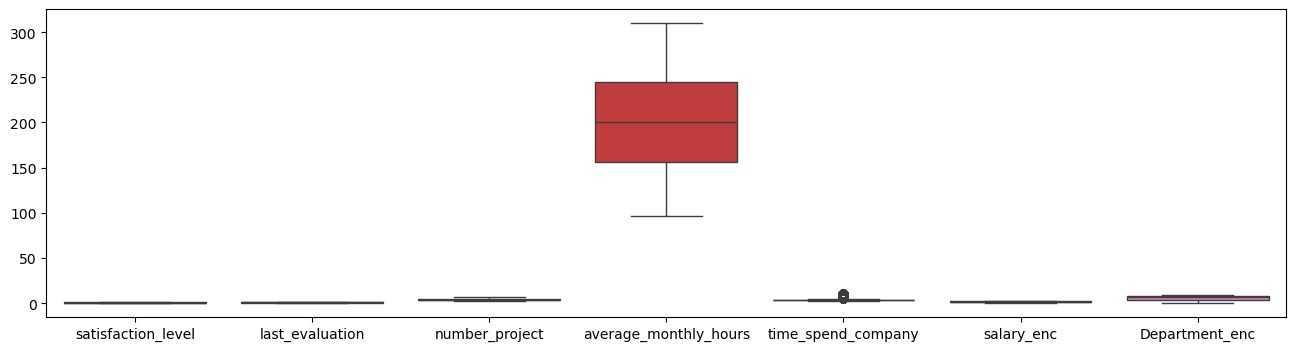

In [102]:
sns.boxplot(data=new_df)
plt.gcf().set_size_inches(16,4)
plt.show()

In [104]:
ser=pd.Series(new_df['time_spend_company'])
q1=ser.quantile(0.25)
q3=ser.quantile(0.75)
iqr=q3-q1
uf=q3+1.5*iqr
lf=q1-1.5*iqr
for z in ser:
    if z>uf:
        new_df['time_spend_company']=new_df['time_spend_company'].replace(to_replace=z,value=uf)
    elif z<lf:
        new_df['time_spend_company']=new_df['time_spend_company'].replace(to_replace=z,value=lf)

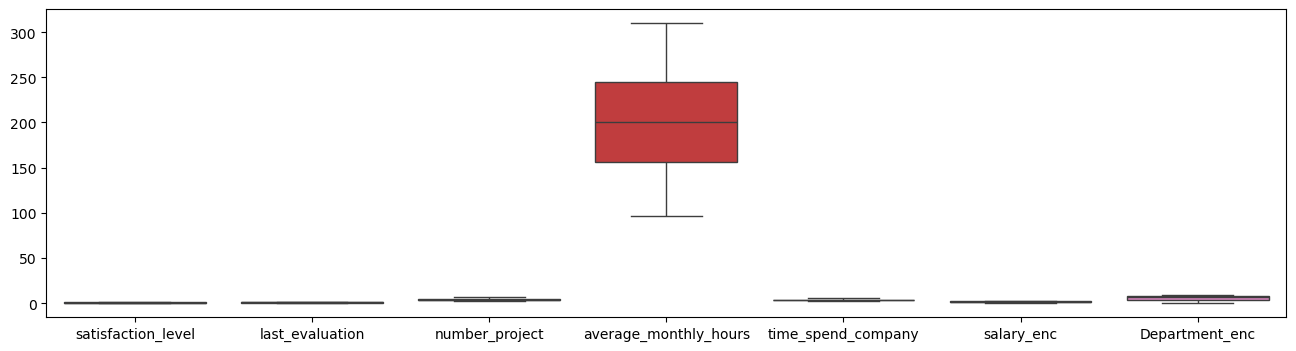

In [106]:
sns.boxplot(data=new_df)
plt.gcf().set_size_inches(16,4)
plt.show()

In [110]:
# d) scalling the features
col = new_df.columns
scale=StandardScaler()
df_scaled=scale.fit_transform(new_df)
df_scaled=pd.DataFrame(df_scaled,columns=col)
df_scaled

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_enc,Department_enc
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.335204,-0.554955,0.393725
1,0.752814,0.840707,0.971113,1.220423,1.965181,1.043004,0.393725
2,-2.022479,0.957554,2.593763,1.420657,0.584950,1.043004,0.393725
3,0.431041,0.899131,0.971113,0.439508,1.505104,-0.554955,0.393725
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.335204,-0.554955,0.393725
...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.335204,-0.554955,0.742316
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.335204,-0.554955,0.742316
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.335204,-0.554955,0.742316
14997,-2.022479,1.424944,1.782438,1.580845,0.584950,-0.554955,0.742316


In [112]:
df_scld=pd.concat([df_scaled,left_df],axis=1)
df_scld

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_enc,Department_enc,Work_accident,left,promotion_last_5years
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.335204,-0.554955,0.393725,0,1,0
1,0.752814,0.840707,0.971113,1.220423,1.965181,1.043004,0.393725,0,1,0
2,-2.022479,0.957554,2.593763,1.420657,0.584950,1.043004,0.393725,0,1,0
3,0.431041,0.899131,0.971113,0.439508,1.505104,-0.554955,0.393725,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.335204,-0.554955,0.393725,0,1,0
...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.335204,-0.554955,0.742316,0,1,0
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.335204,-0.554955,0.742316,0,1,0
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.335204,-0.554955,0.742316,0,1,0
14997,-2.022479,1.424944,1.782438,1.580845,0.584950,-0.554955,0.742316,0,1,0


In [116]:
# e) feature selection
df=df_scld.loc[:,df_scld.columns!='left']
abs(df.corr())>0.7

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary_enc,Department_enc,Work_accident,promotion_last_5years
satisfaction_level,True,False,False,False,False,False,False,False,False
last_evaluation,False,True,False,False,False,False,False,False,False
number_project,False,False,True,False,False,False,False,False,False
average_monthly_hours,False,False,False,True,False,False,False,False,False
time_spend_company,False,False,False,False,True,False,False,False,False
salary_enc,False,False,False,False,False,True,False,False,False
Department_enc,False,False,False,False,False,False,True,False,False
Work_accident,False,False,False,False,False,False,False,True,False
promotion_last_5years,False,False,False,False,False,False,False,False,True


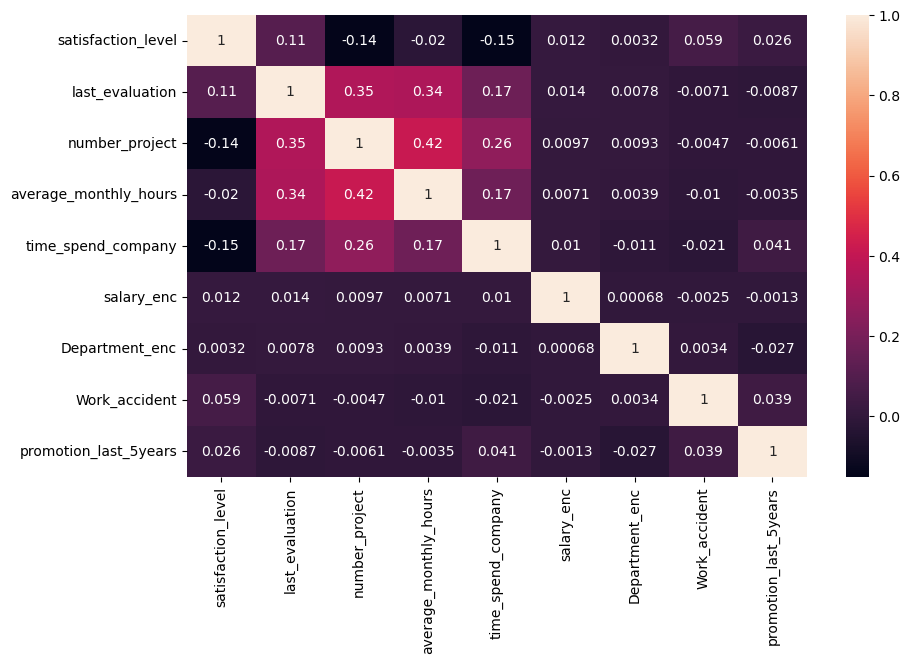

In [120]:
sns.heatmap(df.corr(),annot=True)
plt.gcf().set_size_inches(10,6)
plt.show()

There is no independent fearture that are highly correlated with each other. So, no feature to be dropped

#### Task4

In [128]:
# a) data splitting
log_train,log_test=train_test_split(df_scld,train_size=0.8,random_state=200)
print(log_train.shape)
print(log_test.shape)

(11999, 10)
(3000, 10)


In [132]:
y_train=log_train['left']
X_train=log_train.drop('left',axis=1)

In [134]:
y_test=log_test['left']
X_test=log_test.drop('left',axis=1)

In [136]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11999, 9) (3000, 9) (11999,) (3000,)


In [140]:
# b) logistic model & prediction
logreg=LogisticRegression().fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Task5

In [153]:
# a) confusion matrix
print(confusion_matrix(y_pred,y_test))

[[2073  550]
 [ 168  209]]


In [169]:
print('tn,fp,fn,tp',confusion_matrix(y_pred,y_test).ravel())

tn,fp,fn,tp [2073  550  168  209]


In [159]:
print('f1_score:',f1_score(y_pred,y_test))
print('recall_score:',recall_score(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))
print('precision_score:',precision_score(y_pred,y_test))

f1_score: 0.36795774647887325
recall_score: 0.5543766578249337
accuracy_score: 0.7606666666666667
precision_score: 0.2753623188405797


In [165]:
# b) ROC AUC score & plot
print('ROC score',roc_auc_score(y_pred,logreg.predict_proba(X_test)[:,1]))
#roc auc score of 1 indicates that the model is perfect. The model can perfectly distinguish between positive and negative class.

ROC score 1.0


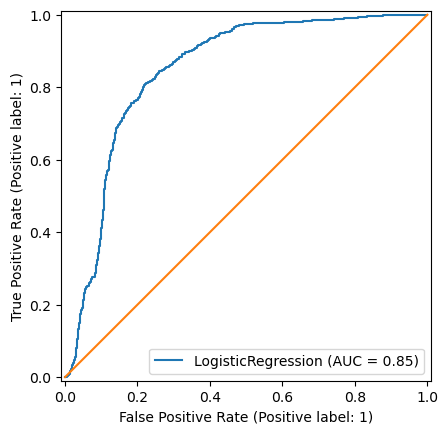

In [167]:
RocCurveDisplay.from_estimator(logreg,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

The higher auc (0.85) value indicate good discrimination between positive and negative class.